# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
# Checking Null Values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
passing_marks = 40

# Maths Result

In [6]:
# np.where(condition, x, y)
data['Math_Pass_Status'] = np.where(data['math score'] < passing_marks, 'F', 'P')

In [7]:
passing = data.Math_Pass_Status.value_counts().tolist()
passing

[960, 40]

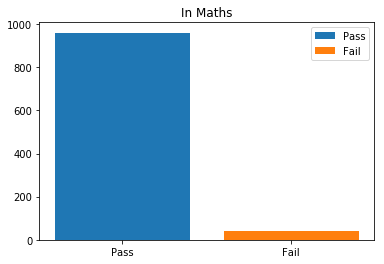

In [8]:
plt.bar(['Pass'], data.Math_Pass_Status.value_counts().P)
plt.bar(['Fail'], data.Math_Pass_Status.value_counts().F)
plt.legend(['Pass', 'Fail'])
plt.title('In Maths')
plt.show()

# Reading Result

In [9]:
Pass = data[data.Math_Pass_Status == 'P']
Fail = data[data.Math_Pass_Status == 'F']

In [10]:
Total_Maths_Fail = Fail.Math_Pass_Status.count()
Total_Maths_Pass = Pass.Math_Pass_Status.count()

In [11]:
data['Reading_Pass_Status'] = np.where(data['reading score'] < passing_marks, 'F', 'P')

In [12]:
data.Reading_Pass_Status.value_counts()

P    974
F     26
Name: Reading_Pass_Status, dtype: int64

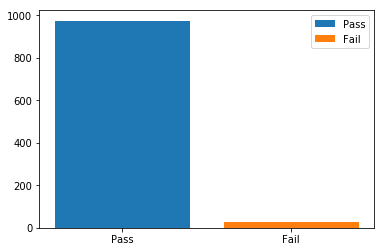

In [13]:
plt.bar(['Pass'], data.Reading_Pass_Status.value_counts().P)
plt.bar(['Fail'], data.Reading_Pass_Status.value_counts().F)
plt.legend(['Pass', 'Fail'])
plt.show()

# Writing Result

In [14]:
data['Writing_Pass_Status'] = np.where(data['writing score'] < passing_marks, 'F', 'P')

In [15]:
data.Writing_Pass_Status.value_counts()

P    968
F     32
Name: Writing_Pass_Status, dtype: int64

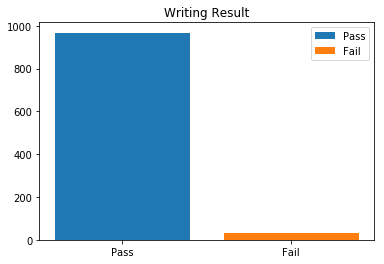

In [16]:
plt.bar(['Pass'], data.Writing_Pass_Status.value_counts().P)
plt.bar(['Fail'], data.Writing_Pass_Status.value_counts().F)
plt.legend(['Pass', 'Fail'])
plt.title('Writing Result')
plt.show()

In [17]:
data['Over_All_Pass_Status'] = data.apply(lambda x: 'F' if x['Math_Pass_Status'] == 'F' or x['Reading_Pass_Status'] == 'F' or x["Writing_Pass_Status"] == 'F' else 'P', axis=1)

In [18]:
data['Total_Marks'] = data['math score'] + data['reading score'] + data['writing score']

In [19]:
data['Percentage'] = data['Total_Marks'] / 3

In [20]:
def Grades(percetage, OverAllPass):
    if OverAllPass == 'F':
        return 'F'
    if percetage >= 80:
        return 'A'
    if percetage >= 70:
        return 'B'
    if percetage >= 60:
        return 'C'
    if percetage >= 50:
        return 'D'
    if percetage >= 40:
        return 'E'
    else:
        return 'F'

In [21]:
data['Grade'] = data.apply(lambda x: Grades(x['Percentage'], x['Over_All_Pass_Status']), axis=1)

# Overall Grades

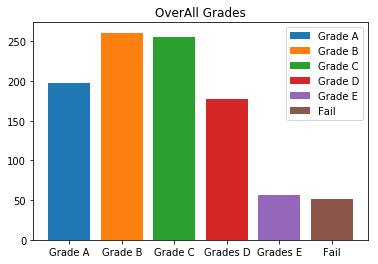

In [22]:
plt.bar(['Grade A'], data[data.Grade == 'A'].count().iloc[1])
plt.bar('Grade B', data[data.Grade == 'B'].count().iloc[1])
plt.bar('Grade C', data[data.Grade == 'C'].count().iloc[1])
plt.bar('Grades D', data[data.Grade == 'D'].count().iloc[1])
plt.bar('Grades E', data[data.Grade == 'E'].count().iloc[1])
plt.bar('Fail', data[data.Grade == 'F'].count().iloc[1])
plt.legend(['Grade A' ,'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Fail'])
plt.title('OverAll Grades')
plt.show()

In [23]:
Highest_Marks = data.Total_Marks.max()
Lowest_Marks = data.Total_Marks.min()

In [24]:
print('Highest Marks = ' , Highest_Marks)
print('Lowest Marks  =  ',  Lowest_Marks)

Highest Marks =  300
Lowest Marks  =   27


In [25]:
Total_Students = data.count().iloc[1]

In [26]:
Total_Pass_Students = data[data.Over_All_Pass_Status == 'P'].count().iloc[1]
Total_Fail_Students = Total_Students - Total_Pass_Students

In [27]:
# def overAllStatus(x):
#     if data['Math_Pass_Status'] == 'F' or data['Reading_Pass_Status'] == 'F' or data['Writing_Pass_Status'] == 'F':
#         data['Over_All_Pass_Status'] = 'F'
#     else:
#         data['Over_All_Pass_Status'] = 'P'

# Grouping

In [28]:
data.head()
levels = data.groupby(data['parental level of education'])
Bachelors_degree = levels.get_group("bachelor's degree")
Some_college = levels.get_group("some college")
Associates_degree = levels.get_group("associate's degree")
High_school = levels.get_group("high school")
Masters_degree = levels.get_group("master's degree")

In [29]:
for g_name, g_data in levels:
    print(g_name)

associate's degree
bachelor's degree
high school
master's degree
some college
some high school


# Bachelors Result

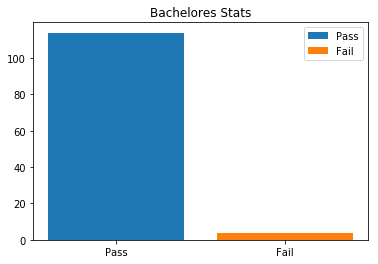

Max Marks = 300
Min Marks = 117


In [30]:
Bachelors_degree_Fail = Bachelors_degree[Bachelors_degree['Over_All_Pass_Status'] == 'F']
Bachelors_degree_Pass = Bachelors_degree[Bachelors_degree['Over_All_Pass_Status'] == 'P']
Total_Bachelors_Fail = Bachelors_degree_Fail.count().iloc[1]
Total_Bachelors_Pass = Bachelors_degree_Pass.count().iloc[1]

# Ploting

plt.bar('Pass', Total_Bachelors_Pass)
plt.bar('Fail', Total_Bachelors_Fail)
plt.title('Bachelores Stats')
plt.legend(["Pass", 'Fail'])
plt.show()

print(("Max Marks = " + str(Bachelors_degree['Total_Marks'].max())))
print(('Min Marks = ' + str(Bachelors_degree['Total_Marks'].min())))

# Masters Result

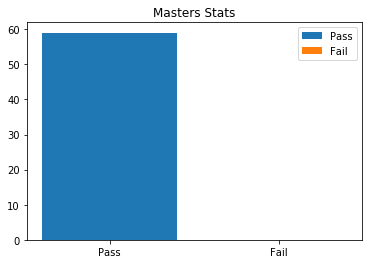

Max Marks = 293
Min Marks = 134


In [31]:
Masters_pass = Masters_degree[Masters_degree['Over_All_Pass_Status'] == 'P']
Masters_fail = Masters_degree[Masters_degree['Over_All_Pass_Status'] == 'F']
Total_Masters_pass = Masters_pass.count().iloc[1]
Total_Masters_fail = Masters_fail.count().iloc[1]

# Ploting
plt.bar('Pass', Total_Masters_pass)
plt.bar('Fail', Total_Masters_fail)
plt.title("Masters Stats")
plt.legend(['Pass', 'Fail'])
plt.show()

print(("Max Marks = " + str(Masters_degree['Total_Marks'].max())))
print(('Min Marks = ' + str(Masters_degree['Total_Marks'].min())))

# College Result

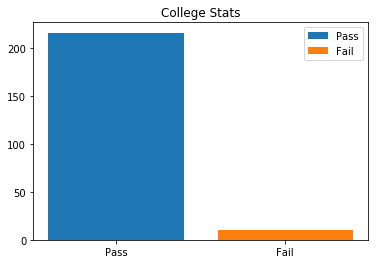

Max Marks = 297
Min Marks = 70


In [32]:
College_pass = Some_college[Some_college['Over_All_Pass_Status'] == 'P']
College_fail = Some_college[Some_college['Over_All_Pass_Status'] == 'F']
Total_college_pass = College_pass.count().iloc[1]
Total_college_fail = College_fail.count().iloc[1]

# Ploting

plt.bar('Pass', Total_college_pass)
plt.bar('Fail', Total_college_fail)
plt.title('College Stats')
plt.legend(['Pass', 'Fail'])
plt.show()

print(("Max Marks = " + str(Some_college['Total_Marks'].max())))
print(('Min Marks = ' + str(Some_college['Total_Marks'].min())))

# High School Result

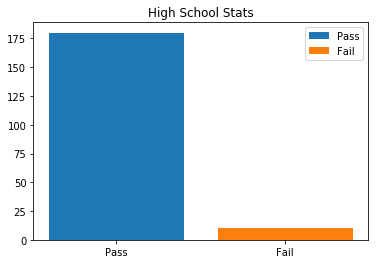

Max Marks = 287
Min Marks = 55


In [33]:
High_school_pass = High_school[High_school['Over_All_Pass_Status'] == 'P']
High_school_fail = High_school[High_school['Over_All_Pass_Status'] == 'F']
Total_high_school_pass = High_school_pass.count().iloc[1]
Total_high_school_fail = High_school_fail.count().iloc[1]

# Ploting

plt.bar('Pass', Total_high_school_pass)
plt.bar('Fail', Total_college_fail)
plt.title('High School Stats')
plt.legend(['Pass', 'Fail'])
plt.show()

print(("Max Marks = " + str(High_school['Total_Marks'].max())))
print(('Min Marks = ' + str(High_school['Total_Marks'].min())))

# Associates Degree Result

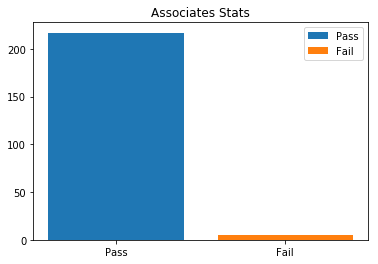

Max Marks = 300
Min Marks = 95


In [34]:
Associates_degree_pass = Associates_degree[Associates_degree['Over_All_Pass_Status'] == 'P']
Associates_degree_fail = Associates_degree[Associates_degree['Over_All_Pass_Status'] == 'F']
Total_Associates_pass = Associates_degree_pass.count().iloc[1]
Total_Associates_fail = Associates_degree_fail.count().iloc[1]

# Ploting

plt.bar('Pass', Total_Associates_pass)
plt.bar('Fail', Total_Associates_fail)
plt.title('Associates Stats')
plt.legend(['Pass', 'Fail'])
plt.show()

print(("Max Marks = " + str(Associates_degree['Total_Marks'].max())))
print(('Min Marks = ' + str(Associates_degree['Total_Marks'].min())))

# Passing Ratio

In [35]:
Passing_Ratio = (data[data.Over_All_Pass_Status == 'P'].count().iloc[1] / data.count().iloc[1]) * 100

In [36]:
print('Passing Ratio = ' , str(Passing_Ratio))

Passing Ratio =  94.89999999999999


# Over All Pass Students sort by parental level of education

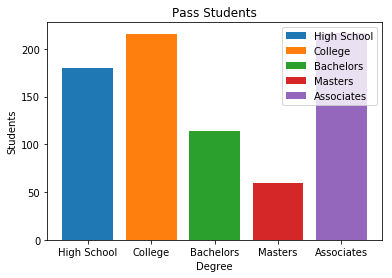

In [37]:
plt.bar('High School', Total_high_school_pass)
plt.bar('College', Total_college_pass)
plt.bar('Bachelors', Total_Bachelors_Pass)
plt.bar('Masters', Total_Masters_pass)
plt.bar('Associates', Total_Associates_pass)
plt.legend(['High School', 'College', 'Bachelors', 'Masters', 'Associates'])
plt.title("Pass Students")
plt.ylabel('Students')
plt.xlabel('Degree')
plt.show()

# Over All Fail Students sort by parental level of education

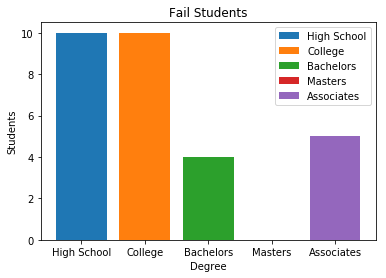

In [38]:
plt.bar('High School', Total_college_fail)
plt.bar('College', Total_college_fail)
plt.bar('Bachelors', Total_Bachelors_Fail)
plt.bar('Masters', Total_Masters_fail)
plt.bar('Associates', Total_Associates_fail)
plt.title("Fail Students")
plt.ylabel('Students')
plt.xlabel('Degree')
plt.legend(['High School', 'College', 'Bachelors', 'Masters', 'Associates'])
plt.show()

In [39]:
# End